<h1 style="color:rgb(0,120,170)">Assignment 5: ICA</h1>

The cumulant-generating function $K_X(t)$ of a random variable $X$ is defined as 
the natural logarithm of the moment-generating function
\begin{equation}
  \newcommand\E{\operatorname{\mathbb{E}}}
  \newcommand\dif{\mathrm{d}}
  K_X(t) = \log \E\left[e^{tX}\right]. 
\end{equation}
Let $\kappa_n(X) = K_X^{(n)}(0)$ the $n$-th derivative of $K_X(t)$ evaluated at $t=0$, 
then the Maclaurin series is 
\begin{equation}
  K_X(t) = \sum_{n=1}^\infty \kappa_n(X) \frac{t^n}{n!}. 
\end{equation}

<h2 style="color:rgb(0,120,170)">Task 1 (50 Points)</h2>

Compare PCA and ICA at the example of the `cifar-10.npy` dataset. Load the dataset, perform PCA and ICA using the implementations of the `sklearn.decomposition` package with 100 components each. Then visualize the components extracted by the two methods using the provided functions `show_image` and `scale`. What differences do you observe and how do they relate to the properties of PCA and ICA? 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, FastICA

def scale(s, a=0, b=1):
    return (b - a) * (s - s.min()) / (s.max() - s.min()) + a

def show_image(img):
    plt.imshow(img.reshape(3, 32, 32).transpose((1, 2, 0)))

c:\Users\Peace Moongen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Text(0.5, 0.98, 'ICA Components')

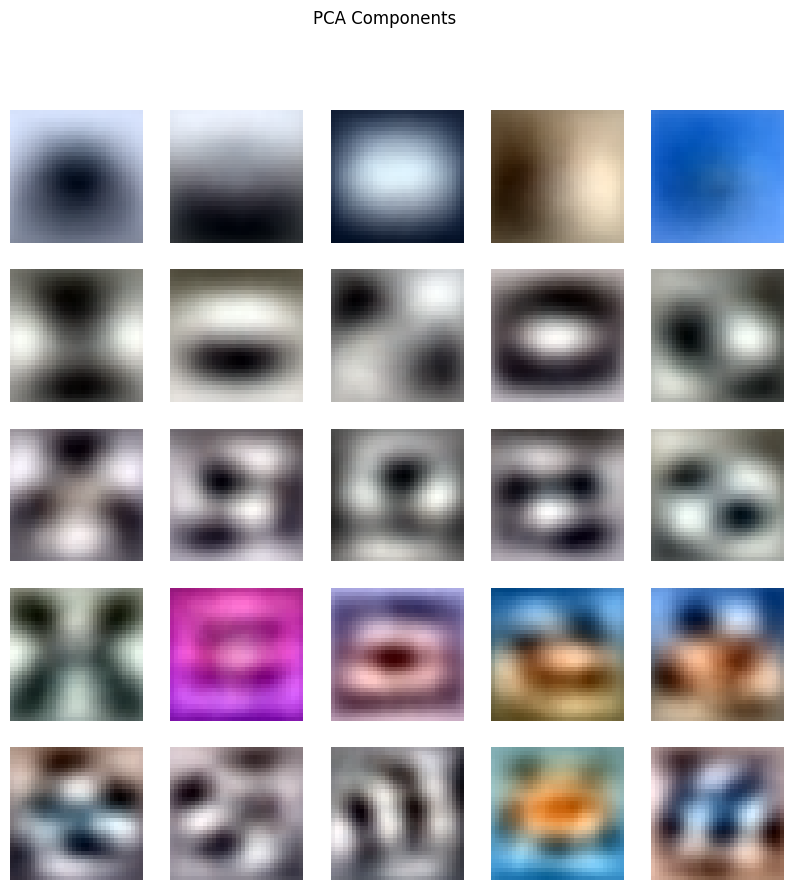

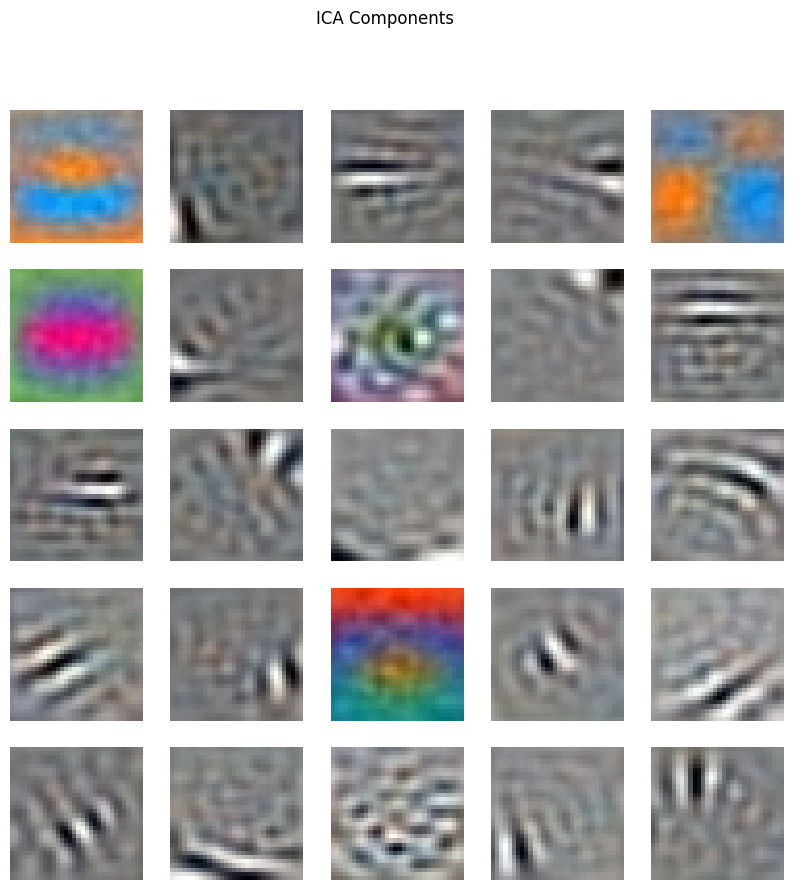

In [ ]:
# Load the dataset
data = np.load('cifar-10.npy')

# Perform PCA
pca = PCA(n_components=100)
pca_components = pca.fit_transform(data)

# Perform ICA
ica = FastICA(n_components=100)
ica_components = ica.fit_transform(data)

# Visualize the first 25 components extracted by PCA
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    show_image(scale(pca.components_[i]))
    plt.axis('off')
plt.suptitle('PCA Components')

# Visualize the first 25 components extracted by ICA
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    show_image(scale(ica.components_[i]))
    plt.axis('off')
plt.suptitle('ICA Components')

<h2 style="color:rgb(0,120,170)">Task 2 (50 Points)</h2>

Consider the cocktail party problem. Read the left channel of the files `birds.wav`, `ocean.wav`, `frogs.wav` using the `scipy.io.wavfile` package. Then construct a full-rank $3 \times 3$ mixing matrix and produce 3 different mixings of those signals. You can listen to them using the `sounddevice` package. Finally, use `FastICA` from the `sklearn.decomposition` package to recover the original sources. Listen to the recovered sources and compare them to the originals to check if ICA was successful. *Hint:* Scale the signals to $[-1,1]$ before playing them. 

In [ ]:
from scipy.io import wavfile
from sklearn.decomposition import FastICA
%pip install sounddevice
import sounddevice as sd

# Load the audio files
rate_birds, birds = wavfile.read('birds.wav')
rate_ocean, ocean = wavfile.read('ocean.wav')
rate_frogs, frogs = wavfile.read('frogs.wav')

# Get the left channel of each signal
birds = birds[:, 0]
ocean = ocean[:, 0]
frogs = frogs[:, 0]

# Scale the signals to [-1, 1]
birds = scale(birds, -1, 1)
ocean = scale(ocean, -1, 1)
frogs = scale(frogs, -1, 1)

# Construct a mixing matrix
mixing_matrix = np.array([[0.5, 0.2, 0.3], [0.4, 0.3, 0.6], [0.2, 0.5, 0.1]])

# Mix the signals using the mixing matrix
mix1 = mixing_matrix.dot(np.array([birds, ocean, frogs]))
mix2 = mixing_matrix.dot(np.array([ocean, birds, frogs]))
mix3 = mixing_matrix.dot(np.array([frogs, birds, ocean]))

# Apply FastICA to recover the original sources
ica = FastICA(n_components=3)
sources1 = ica.fit_transform(mix1.T)
sources2 = ica.fit_transform(mix2.T)
sources3 = ica.fit_transform(mix3.T)

# Scale the sources to [-1, 1]
sources1 = sources1 / np.max(np.abs(sources1))
sources2 = sources2 / np.max(np.abs(sources2))
sources3 = sources3 / np.max(np.abs(sources3))

# Listen to the original signals and the recovered sources
print("Original signals:")
sd.play(birds, rate_birds)
sd.wait()
sd.play(ocean, rate_ocean)
sd.wait()
sd.play(frogs, rate_frogs)
sd.wait()

print("Recovered sources (mix1):")
sd.play(sources1[:, 0], rate_birds)
sd.wait()
sd.play(sources1[:, 1], rate_ocean)
sd.wait()
sd.play(sources1[:, 2], rate_frogs)
sd.wait()

print("Recovered sources (mix2):")
sd.play(sources2[:, 0], rate_ocean)
sd.wait()
sd.play(sources2[:, 1], rate_birds)
sd.wait()
sd.play(sources2[:, 2], rate_frogs)
sd.wait()

print("Recovered sources (mix3):")
sd.play(sources3[:, 0], rate_frogs)
sd.wait()
sd.play(sources3[:, 1], rate_birds)
sd.wait()
sd.play(sources3[:, 2], rate_ocean)
sd.wait()

You should consider upgrading via the 'c:\Users\Peace Moongen\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


c:\Users\Peace Moongen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\Peace Moongen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\Peace Moongen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Original signals:
Recovered sources (mix1):
Recovered sources (mix2):
Recovered sources (mix3):
